<a href="https://colab.research.google.com/github/decoderkurt/HUF_RL_2022/blob/main/27/pybullet_gif_sb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip3 install pybullet --upgrade
!pip3 install stable_baselines --upgrade
!pip3 install tensorflow==1.14.0 #tensorflow deprecates and breaks their API
!pip3 install numpngw

In [51]:
import pybullet_envs
pybullet_envs.getList()

['- HumanoidDeepMimicBackflipBulletEnv-v1',
 '- HumanoidDeepMimicWalkBulletEnv-v1',
 '- CartPoleBulletEnv-v1',
 '- CartPoleContinuousBulletEnv-v0',
 '- MinitaurBulletEnv-v0',
 '- MinitaurBulletDuckEnv-v0',
 '- RacecarBulletEnv-v0',
 '- RacecarZedBulletEnv-v0',
 '- KukaBulletEnv-v0',
 '- KukaCamBulletEnv-v0',
 '- InvertedPendulumBulletEnv-v0',
 '- InvertedDoublePendulumBulletEnv-v0',
 '- InvertedPendulumSwingupBulletEnv-v0',
 '- ReacherBulletEnv-v0',
 '- PusherBulletEnv-v0',
 '- ThrowerBulletEnv-v0',
 '- Walker2DBulletEnv-v0',
 '- HalfCheetahBulletEnv-v0',
 '- AntBulletEnv-v0',
 '- HopperBulletEnv-v0',
 '- HumanoidBulletEnv-v0',
 '- HumanoidFlagrunBulletEnv-v0',
 '- HumanoidFlagrunHarderBulletEnv-v0',
 '- MinitaurExtendedEnv-v0',
 '- MinitaurReactiveEnv-v0',
 '- MinitaurBallGymEnv-v0',
 '- MinitaurTrottingEnv-v0',
 '- MinitaurStandGymEnv-v0',
 '- MinitaurAlternatingLegsEnv-v0',
 '- MinitaurFourLegStandEnv-v0',
 '- KukaDiverseObjectGrasping-v0']

In [ ]:
#see PyBullet Quickstart Guide at
#https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit

import imageio
import numpy as np
import pybullet_envs as pe

from stable_baselines import SAC

#env_name = "CartPoleContinuousBulletEnv-v0"
#env_name = "MinitaurStandGymEnv-v0"
#env_name = "HopperBulletEnv-v0"
env_name = "HalfCheetahBulletEnv-v0"

max_episode_cnt = 100000

model = SAC("MlpPolicy", env_name, verbose=1)
%time model.learn(max_episode_cnt)

print("done learning")


Creating environment from the given name, wrapped in a DummyVecEnv.
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f415b02ee50>> 
    args: (<tf.Tensor 'input/input/Ob:0' shape=(?, 26) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Entity <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f415b02ee50>> is not cached for key <code object call at 0x7f41731378a0, file "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/core.py", line 570> subkey (<tensorflow.python.autograph.core.converter.ConversionOptions object at 0x7f415bafd310>, frozenset())
INFO:tensorflow:Converting <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f415b02ee50>>
INFO:tensorflow:Source code of <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f415b02ee50>>:

from __future__ import absolute_import
from __future__ import division
from __f

In [53]:
images = []
obs = model.env.reset()
img = model.env.render(mode='rgb_array')
done = False

while not done:
    action, _ = model.predict(obs)
    obs, _, done ,_ = model.env.step(action)
    img = model.env.render(mode='rgb_array')
    images.append(img)

model.env.close()

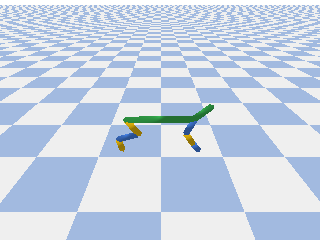

In [54]:
from IPython.display import Image
from numpngw import write_apng

write_apng('anim.png', images, delay=20)
Image(filename='anim.png')
